In [1]:
import os
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize
from matplotlib.pyplot import cm
from lmfit import Model

## User-defined functions

In [60]:
def load_dataset(path_folder,run):
    path=path_folder+"AnalyzedDataFFT_Run_"+str(run)+"_sliced.xlsx"
    meta = pd.read_excel(path,sheet_name=0,header=None)
    freq = pd.read_excel(path,sheet_name=1)[1]
    fft = pd.read_excel(path,sheet_name=2)
    
    data=pd.DataFrame({'freq':freq})
    
    columns=fft.columns
        
    j=0
    for column in columns[1:]:
        colname = 'fft' + str(run)+"_"+str(j)
        data[colname]=fft[column]
        
        j+=1
        
    cavity_freq=meta.iloc[3,1]
                
    return data,cavity_freq

In [70]:
def fit_run(path_folder,run,subrun=0):
    
    data,center=load_dataset("db/",397)
    
    def fitm(x,a,b,c,d,e,f):
        return e**2*abs(x-a+1j*b)**2/abs(x-c+1j*d)**2+f*(x-c)

    interval=data.copy()
    interval = data[(data['freq']>center-65100) & (data['freq']<center+65100)] # finestra di 200 bin ognuno da 651 Hz
    
    xfreq = interval['freq']
    fmin,fmax = min(xfreq),max(xfreq)
    yfft=interval.iloc[:,subrun+1]
    
    fmodel = Model(fitm)
    ps = fmodel.make_params(a=center, b=2e4, c=center,d=2.2e4,e=1e-2,f=1e-8)
    ps.add('a', value=center, min=center*0.999, max=center*1.01)
    ps.add('c', value=center, min=center*0.999, max=center*1.01)

    result = fmodel.fit(yfft,x=xfreq, params=ps)
    
    fig,ax=plt.subplots(1,2,figsize=(18,9))

    ax[0].scatter(xfreq,yfft,alpha=0.3)
    ax[0].vlines(center,0,6,'green')
    ax[0].set_ylim([4e-5,7e-5])
    ax[0].set_xlim([fmin,fmax])
    ax[0].plot(xfreq,result.best_fit, label='linear model',color="red")
    ax[0].set_title("Fit result")

    ax[1].hist(result.residual)
    ax[1].set_title("Residuals")
    plt.show()
    
    return(result)
    

## FIT RUN

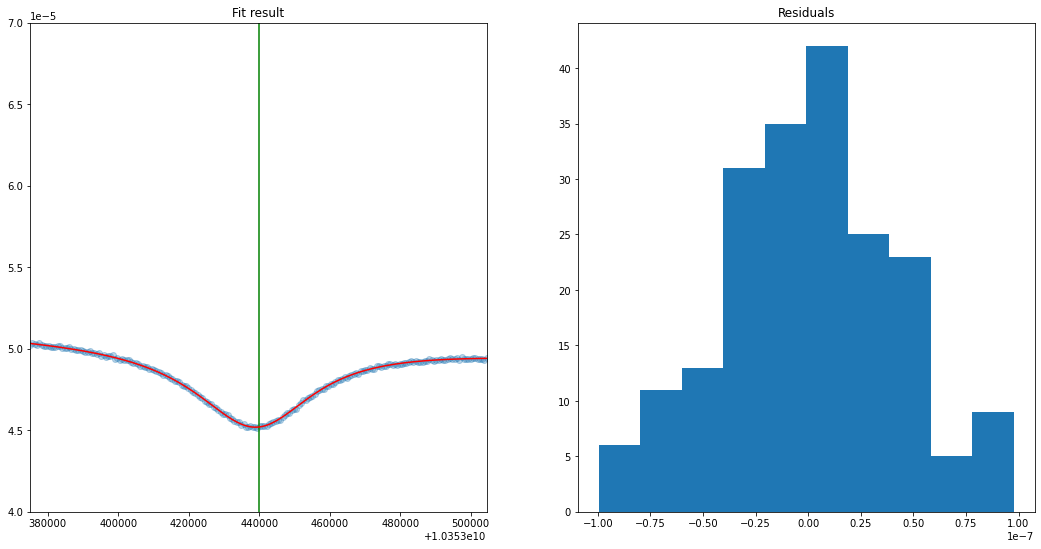

In [72]:
fit_run("db/",413)